In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"

In [3]:
# load the training data from iris.txt
df_training = pd.read_csv(location )

In [4]:
df_training.shape

(150, 5)

In [78]:
df_training.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# copy the predictor variables into X and responses in y
X = df_training[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y = df_training['class']

X - typically means MATRICES (n dimension arrays)

y - typically means response - 1 dimension array

In [6]:
# split the data into training and test data
# for class balance enter stratify=y, [stratify=n does not seem to work]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [8]:
X_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
32,5.2,4.1,1.5,0.1
52,6.9,3.1,4.9,1.5
70,5.9,3.2,4.8,1.8


In [9]:
y_train[:3]

32        Iris-setosa
52    Iris-versicolor
70    Iris-versicolor
Name: class, dtype: object

In [10]:
X_test.shape

(45, 4)

In [123]:
df_training.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


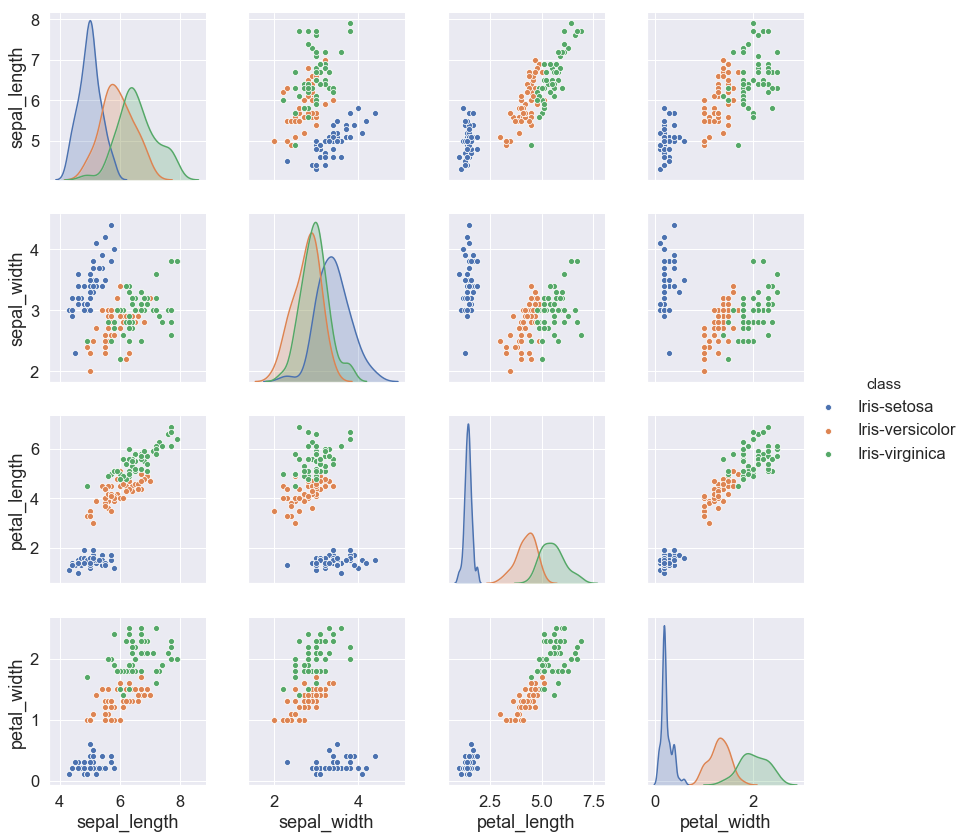

In [124]:
sns.pairplot(data=df_training, hue='class', size=3);

In [11]:
# instantiate the classifier
# knn = KNeighborsClassifier(n_neighbors=5)
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

knn = KNeighborsClassifier(n_neighbors=5)

In [12]:
# fit the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
# making predictions on the testing set
y_pred = knn.predict(X_test)

In [14]:
len(y_pred)

45

In [129]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [15]:
y_test

87     Iris-versicolor
111     Iris-virginica
10         Iris-setosa
91     Iris-versicolor
49         Iris-setosa
60     Iris-versicolor
72     Iris-versicolor
67     Iris-versicolor
39         Iris-setosa
55     Iris-versicolor
66     Iris-versicolor
142     Iris-virginica
53     Iris-versicolor
1          Iris-setosa
19         Iris-setosa
112     Iris-virginica
85     Iris-versicolor
38         Iris-setosa
21         Iris-setosa
35         Iris-setosa
102     Iris-virginica
132     Iris-virginica
126     Iris-virginica
24         Iris-setosa
61     Iris-versicolor
2          Iris-setosa
95     Iris-versicolor
90     Iris-versicolor
76     Iris-versicolor
117     Iris-virginica
58     Iris-versicolor
97     Iris-versicolor
129     Iris-virginica
114     Iris-virginica
146     Iris-virginica
47         Iris-setosa
124     Iris-virginica
120     Iris-virginica
118     Iris-virginica
141     Iris-virginica
26         Iris-setosa
43         Iris-setosa
59     Iris-versicolor
41         

In [131]:
metrics.confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 14]], dtype=int64)

In [16]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))

kNN model accuracy: 0.9777777777777777


In [17]:
# making prediction for out of sample data
sample = [[3, 5, 4, 2]]

preds = knn.predict(sample)
preds

array(['Iris-versicolor'], dtype=object)

In [18]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("kNN model accuracy:\n", metrics.classification_report(y_test, y_pred))

kNN model accuracy:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.97        14

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [135]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.9778242192035296

In [26]:
# find the difference between the sets
set(y_test) - set(y_pred)

set()

In [23]:
x=(knn.predict_proba(X_test))

In [24]:
#### Kuldeep's issue 

In [25]:
inputarray = ['4.5', '3.1', '2.9', '5.1']

In [26]:
exp_measure=np.array(inputarray)
exp_measure1=exp_measure.reshape(1, len(exp_measure))
exp_measure1.shape

(1, 4)

In [52]:
exp_measure1

array([['4.5', '3.1', '2.9', '5.1']],
      dtype='<U3')

In [53]:
df = df_training

In [54]:
x = np.array(df.drop(['class'],1))

In [55]:
y = np.array(df['class'])

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10)

In [57]:
clf = KNeighborsClassifier()

In [58]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
accuracy = clf.score(x_test, y_test)

In [60]:
print(accuracy)

0.933333333333


In [61]:
clf.predict(exp_measure1)

array(['Iris-virginica'], dtype=object)

#### Tree tuning

In [39]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=10)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
y_pred = knn.predict(X_test)

In [44]:
print(metrics.confusion_matrix(y_test, y_pred))
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
kNN model accuracy: 0.9777777777777777


In [53]:
# print the neighbors
knn.kneighbors([[1, 2,3, 5]], n_neighbors=5)

(array([[5.34789678, 5.60892146, 5.6480085 , 5.67274184, 5.67890835]]),
 array([[74, 84,  4, 32, 81]], dtype=int64))